In [ ]:
#As we dont have any GPU we will be using google collab for GPU usage
#Mout at drive 
import sys
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 2.7 MB/s 


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
#plotting the best parameters
import matplotlib.patches as mpatches

# plotly
from chart_studio import plotly as py
#import plotly.plotly as py
import plotly
import plotly.offline as pyo

from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode()
import plotly.graph_objs as go
import plotly.figure_factory as ff # import figure factory

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import numpy as np

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing"


In [ ]:
df = pd.read_csv(path + '/dataset/created/cleaned_df.csv')

In [ ]:

df =  shuffle(df).reset_index(drop=True)
df.head()

,text,label,cleaned_text
0,i know i’m late but i’m pages from the end of ...,0,know im late im page end educate never want en...
1,i had the worst fucking day ever and i honestl...,1,bad fucking day ever honestly feel stupid hope...
2,@Jeremy_Hunt @koninklijkhuis Welcome to the UK...,0,welcome uk true democracy grant vote people co...
3,i’m definitely losing my mind i just walked to...,0,im definitely lose mind walk old uni house for...
4,just want yo love to be genuine i’m the one th...,0,want yo love genuine im one use wont change an...


In [ ]:
#removing shortwords
df.cleaned_text=df['cleaned_text'].astype(str)
tokenized_df=df['cleaned_text'].apply(lambda x: x.split())
tokenized_df.head(5)

0    [know, im, late, im, page, end, educate, never...
1    [bad, fucking, day, ever, honestly, feel, stup...
2    [welcome, uk, true, democracy, grant, vote, pe...
3    [im, definitely, lose, mind, walk, old, uni, h...
4    [want, yo, love, genuine, im, one, use, wont, ...
Name: cleaned_text, dtype: object

In [ ]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(5)

,text,label,cleaned_text
0,i know i’m late but i’m pages from the end of ...,0,know late page educate never want absolutely e...
1,i had the worst fucking day ever and i honestl...,1,fucking ever honestly feel stupid hopeless don...
2,@Jeremy_Hunt @koninklijkhuis Welcome to the UK...,0,welcome true democracy grant vote people compl...
3,i’m definitely losing my mind i just walked to...,0,definitely lose mind walk house forget dont li...
4,just want yo love to be genuine i’m the one th...,0,want love genuine wont change anything give


In [ ]:
df.shape

(49178, 3)

In [ ]:

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['cleaned_text'].values.astype('U'))

In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)



In [ ]:
print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (39342, 36461)
x_test:  (9836, 36461)
y_train:  (39342,)
y_test:  (9836,)


In [ ]:
def plot_cm(y_true, y_pred,filename, figsize=(8,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d' % (p, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=['non-suicidal', 'suicidal'], columns=['non-suicidal', 'suicidal'])
    sns.set(font_scale=2) # Adjust to fit
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "OrRd", annot=annot, fmt='', ax=ax)
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label',fontsize=18)
    plt.xticks( rotation=0, weight = 'bold')
    plt.yticks( rotation=90, weight = 'bold')
    # plt.tick_params(rotation=10,axis='x', labelsize=18)
    plt.savefig(path + "/model/ml comparison/"+filename+".png")
    plt.show()
    plt.close()

In [ ]:
def Model(model,name):
    model.fit(X_train,y_train)
    cross = cross_val_score(model, X, y, cv = 10, n_jobs = -1,scoring = 'accuracy')
    print("Cross Validation score = ",cross)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    # cm = confusion_matrix(y_test,prediction)
    print('{} Trainng Score {}\n'.format(name,model_train_score))
    print('{} Testing Score {}\n'.format(name,model_test_score))
    # print("confusion Matrix\n",cm)
    plot_cm(y_test, prediction,name)
    return cross

**MultinomialNB**

Cross Validation score =  [0.84810899 0.84444896 0.8452623  0.85144891 0.84880529]
Multinomial Naive Bayes Trainng Score 0.9092572822937319

Multinomial Naive Bayes Testing Score 0.8503456689711265



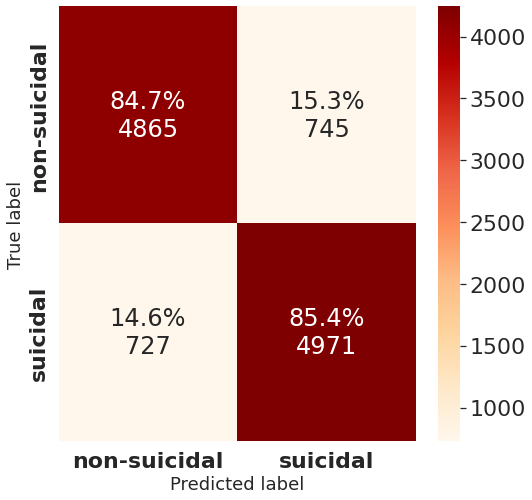

In [ ]:

MNB = MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
MNB_model = Model(MNB,"Multinomial Naive Bayes")

**SGDClassifier**

Cross Validation score =  [0.91175275 0.91134608 0.91246442 0.91154042 0.91265887]
SGD classifier Trainng Score 0.9492145798383407

SGD classifier Testing Score 0.9099227328182188



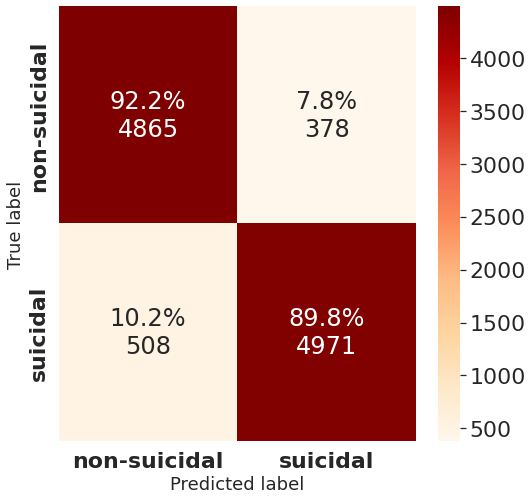

In [ ]:

SGD = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
SGD_model = Model(SGD,"SGD classifier")

**LogisticRegression**

Cross Validation score =  [0.91205775 0.90900773 0.91358276 0.91113371 0.91255719]
Logistic Regression classifier Trainng Score 0.9500787961974481

Logistic Regression classifier Testing Score 0.909414396095974



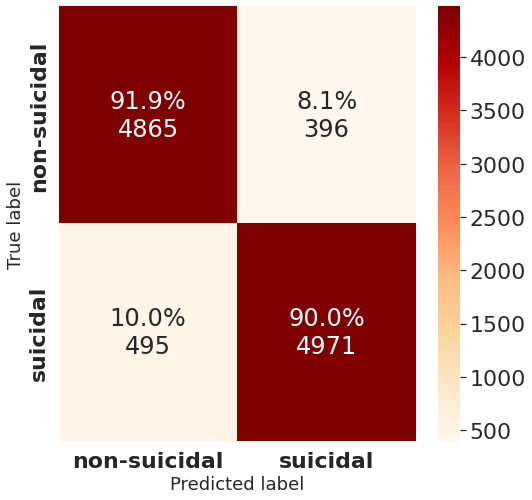

In [ ]:

LR = LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear',C=0.8,random_state=42,tol=0.0001,max_iter=200)
LR_model = Model(LR,"Logistic Regression classifier")

**RandomForest Classifier**

In [ ]:

RF = RandomForestClassifier(n_estimators=200,criterion ='entropy')
RF_model = Model(RF,"Randomforrenst classifier")

**SVC**

In [ ]:

SVC = SVC(random_state=42)
SVC_model = Model(SVC,"Support Vector classifier")

In [ ]:

MLA = {
     'Multinomial Naive Bayes' : MNB,
     'SGD Classifier' : SGD,
     'Logistic Regression' : LR,
     'Random Forrest' : RF,
     'SVC' : SVC,

}

In [ ]:
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=4
row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    predicted = alg.predict(X_test)
    auc_score = roc_auc_score(y_test, predicted)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'micro')
    macro_averaged_f1 = f1_score(y_test, predicted, average = 'macro')
    precisions =precision_score(y_test, predicted, average = 'micro')
    
    compare.loc[row_index,'Name'] = MLA_name
    # compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'AUC'] = auc_score
    compare.loc[row_index, 'Precision'] = precisions
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1
    
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Test Accuracy,AUC,Precision,Recall,F1 Score
3,Random Forrest,0.9300,0.929951,0.929951,0.929951,0.929942
4,SVC,0.9198,0.919784,0.919784,0.919784,0.919749
1,SGD Classifier,0.9170,0.917039,0.917039,0.917039,0.916999
2,Logistic Regression,0.9122,0.912159,0.912159,0.912159,0.912121
0,Multinomial Naive Bayes,0.8464,0.846381,0.846381,0.846381,0.846378


In [ ]:
compare = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/dataset/created/ml_compare.csv")
compare.head()

,Name,Test Accuracy,Precision,Recall,F1 Score,auc Score
0,RF,0.9300,0.929951,0.929951,0.929942,0.929951
1,SVC,0.9198,0.919784,0.919784,0.919749,0.919784
2,SGD,0.9170,0.917039,0.917039,0.916999,0.917039
3,LR,0.9122,0.912159,0.912159,0.912121,0.912159
4,MNB,0.8464,0.846381,0.846381,0.846378,0.846381


In [ ]:
#plot comaparison 
def compare_plots(y_value,filename):
  plt.subplots(figsize=(11,8))
  sns.barplot(x="Name", y=y_value ,data=compare,palette='hot',hue="Name",edgecolor=sns.color_palette('dark',7),dodge=False)
  plt.xlabel('ML Algorithms',fontsize=18)
  plt.ylabel(y_value,fontsize=18)
  plt.xticks( rotation=0, weight = 'bold', )
  plt.yticks( rotation=0, weight = 'bold')
  plt.tick_params(rotation=0,axis='y', labelsize=15)
  plt.tick_params(rotation=0,axis='x', labelsize=18)
  plt.title('Comparing techniques with '+y_value+'.')
  plt.legend(loc = 2, bbox_to_anchor = (1,1))
  plt.savefig(path + "/model/ml comparison/"+filename+".png")
  plt.show()
  return plt

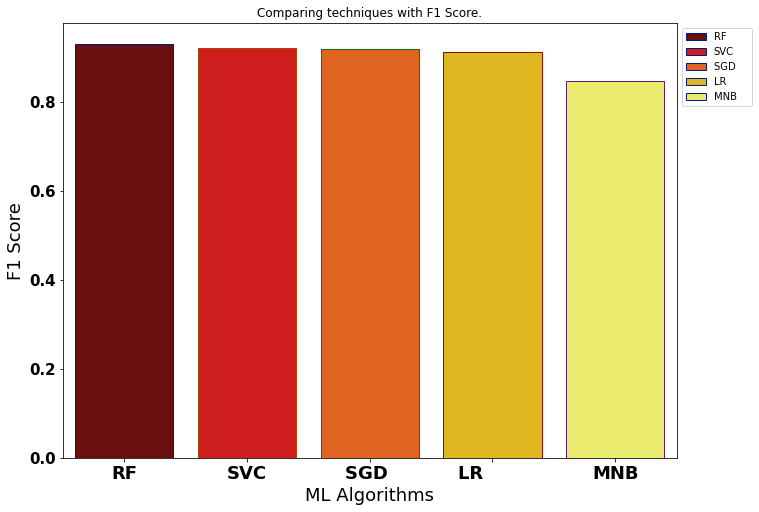

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
compare_plots("F1 Score","F1 Score")

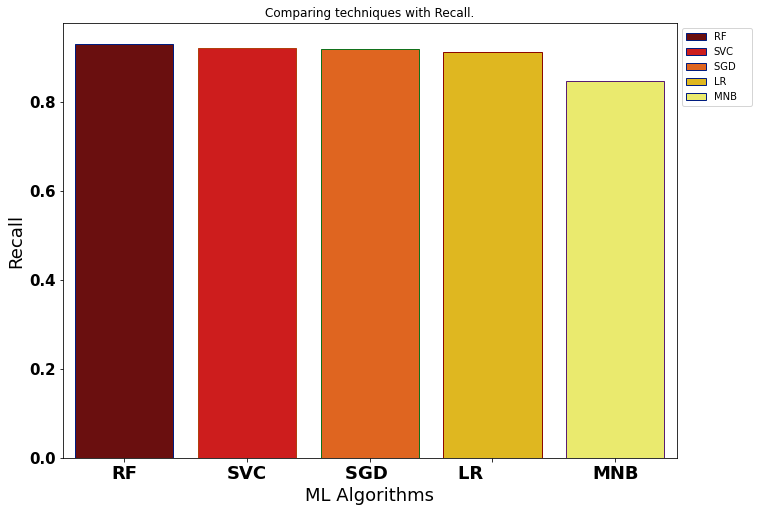

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
compare_plots("Recall","Recall")

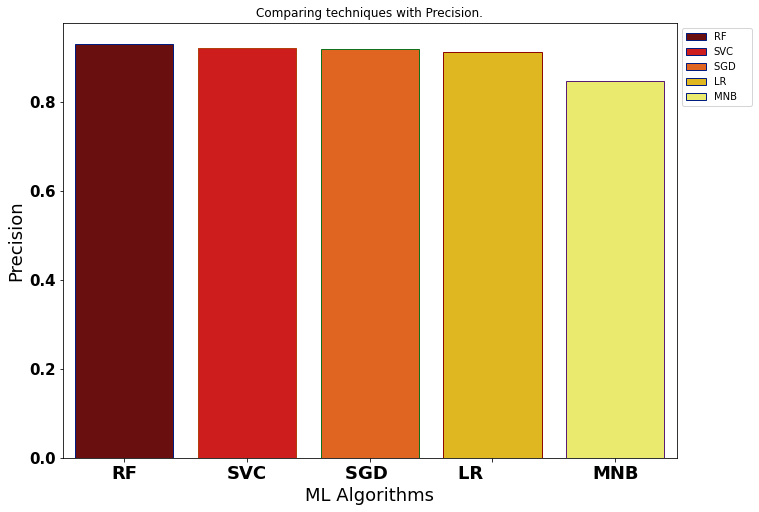

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
compare_plots("Precision","Precision")

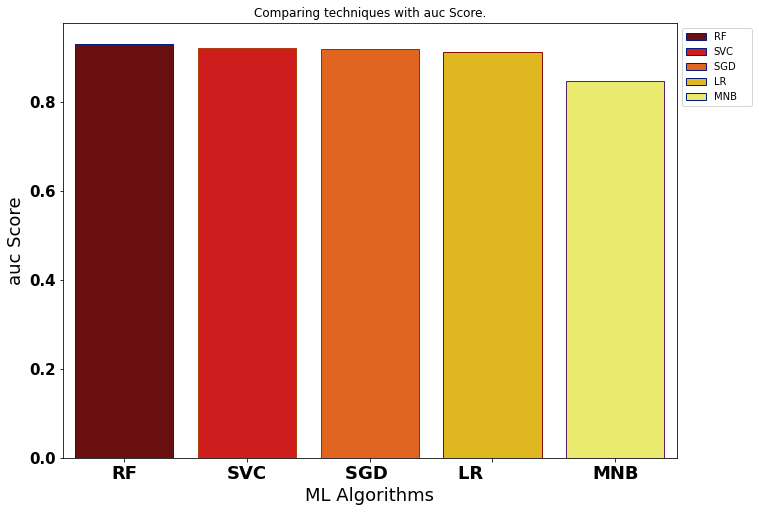

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
compare_plots("auc Score","AUC")

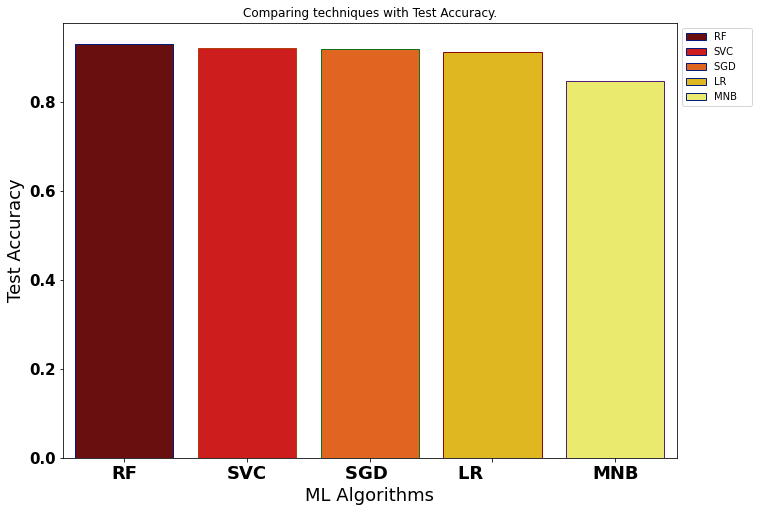

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
compare_plots("Test Accuracy","test_acc")

In [ ]:
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 53 kB/s 


In [ ]:

# create trace2 
trace2 = go.Bar(
         x = np.array("Multinomial Naive Bayes"),
         y = np.array(compare[compare["Name"] == 'Multinomial Naive Bayes']['Test Accuracy']),
         name = "Multinomial Naive Bayes",
         marker = dict(color ='rgba(9, 220, 125, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace3 
trace3 = go.Bar(
         x = np.array("SGD Classifier"),
         y = np.array(compare[compare["Name"] == 'SGD Classifier']['Test Accuracy']),
         name = "SGD Classifier",
         marker = dict(color ='rgba(36, 44, 188, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace4 
trace4 = go.Bar(
         x = np.array("Random Forrest"),
         y = np.array(compare[compare["Name"] == 'Random Forrest']['Test Accuracy']),
         name = "Random Forrest",
         marker = dict(color ='rgba(209, 0, 224, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace5 
trace5 = go.Bar(
         x = np.array("Logistic Regression"),
         y = np.array(compare[compare["Name"] == 'Logistic Regression']['Test Accuracy']),
         name = "Logistic Regression",
         marker = dict(color ='rgba(0, 224, 209, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace6 
trace6 = go.Bar(
         x = np.array("SVC"),
         y = np.array(compare[compare["Name"] == 'SVC']['Test Accuracy']),
         name = "SVC",
         marker = dict(color ='rgba(255, 255, 61, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )

data = [trace4,trace6,trace3,trace5,trace2]
layout = go.Layout(barmode = "group",title="Machine Learning Classification Models test accuracy Comparison")
fig = go.Figure(data = data, layout = layout)
fig.show(renderer="colab")

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

# Logistic regression
modelLR =LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear',C=0.8,random_state=42,tol=0.0001,max_iter=200)
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)



# Naive Bayes
modelNB= MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

# SVM with rbf
from sklearn import svm
modelSVMrbf=svm.SVC(probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# Random forest
modelRF= RandomForestClassifier(n_estimators=200,criterion ='entropy')
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)



In [ ]:
from sklearn.calibration import CalibratedClassifierCV
# SVM with linear
modelSVMlinear=SGDClassifier( loss='hinge',penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
modelSVMlinear = modelSVMlinear.fit(X_train,y_train)
calibrator = CalibratedClassifierCV(modelSVMlinear, cv='prefit')
modelSVMlinear = calibrator.fit(X_train, y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)


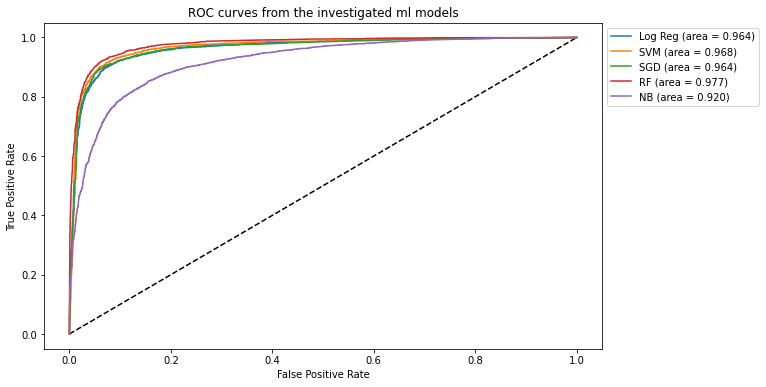

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SGD (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated ml models')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plt.savefig(path + "/model/ml comparison/mlroc.png")
plt.show()